## 미션: 네이버 도서에서 책 제목에 '파이썬'이 들어간 2017~2023년도 까지의 도서 출판리스트 다운

1.꺾은선 차트출력

2.도서가격 산점도 및 히스토그램 출력

3.출판사별 도서출판횟수 및 가격평균,대푯값,편차등 기술평균 출력

4.도서비용이 가장 비싼 상위top5개, 가장 저렴한 하위5개의 image 다운

5. 연도별로 명사단위 형태소 토큰화 하여 ㅏ장많이 나온 글자를 워드클라우드 하기

In [ ]:
# 힌글폰트설치하고 기존 폰트 캐시지우기
!apt-get -y install fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 기본 폰트 설정 변경
plt.rcParams['font.family'] = 'NanumGothic'

In [1]:
cd /content/drive/MyDrive/텍스트 마이닝

/content/drive/MyDrive/텍스트 마이닝


In [ ]:
#그냥 가져오기
import requests
def search_naver_blog(query, client_id, client_secret):
    # 네이버 API 엔드포인트 및 파라미터 설정
    api_url = 'https://openapi.naver.com/v1/search/book'
    headers = {
        'X-Naver-Client-Id': client_id,
        'X-Naver-Client-Secret': client_secret
    }
    params = {'query': query}

    # 네이버 블로그에서 검색 결과 가져오기
    response = requests.get(api_url, headers=headers, params=params)
    result = response.json()

    # JSON 형식으로 출력
    return result

# 네이버 API 클라이언트 ID와 클라이언트 시크릿 입력
your_client_id = ' '
your_client_secret = ' '

# 검색할 쿼리 입력
search_query = '파이썬'

# 네이버 블로그 검색 함수 호출
result = search_naver_blog(search_query, your_client_id, your_client_secret)

# JSON 결과 출력
result

In [13]:
ls

'2_크롤링기초복습 및 미술관옆 동물원 html 시나리오.ipynb'
 filtered_books.json
 NanumGothic.ttf
 naver_blog_search_results.json
 naver_book_search_results.json
'미술관옆동물원(시나리오샘플국립국어원).html'
 병원노쇼df.csv
 병원노쇼_강사님코드.ipynb
'병원노쇼 크롤링.ipynb'
 파이썬도서df.csv


In [ ]:
#2017~2023 파라미터 지정
import requests
import json
from datetime import datetime, timedelta
# 네이버 API 관련 정보
naver_api_client_id = " "  # 발급받은 API 클라이언트 ID
naver_api_client_secret = " "  # 발급받은 API 클라이언트 Secret
# 검색할 키워드와 기간 설정
keyword = '파이썬'
start_date = '20171231'
end_date = '20231231'
# API 요청을 위한 함수 정의
def naver_book_search(query, start_date, end_date, display=100):
    url = 'https://openapi.naver.com/v1/search/book.json'
    headers = {
        'X-Naver-Client-Id': naver_api_client_id,
        'X-Naver-Client-Secret': naver_api_client_secret
    }
    result_list = []
    start = 1
    while True:
        params = {
            'query': query,
            'display': display,
            'start': start,
            'sort': 'sim',
            'filter': 'all',
            'd_start': start_date,
            'd_end': end_date
        }
        response = requests.get(url, params=params, headers=headers)
        result_json = response.json()
        if 'items' in result_json:
            # postdate 날짜 필터링
            filtered_results = [item for item in result_json['items'] if start_date <= item.get('pubdate', '') <= end_date]
            result_list.extend(filtered_results)
            # 다음 페이지가 없으면 반복 종료
            if len(result_json['items']) < display:
                break
            # 다음 페이지의 시작 위치 설정
            start += display
        else:
            break
    return {'books': result_list}
# API 요청 및 결과 수신
search_results = naver_book_search(keyword, start_date, end_date)
# 결과 출력 (JSON 형태)
print(json.dumps(search_results, ensure_ascii=False, indent=2))
output_file_path = 'naver_book_search_results.json'
with open(output_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(search_results, json_file, ensure_ascii=False, indent=2)

# # 다시 파일을 읽어올 때의 예제
# json_file_path = '/content/drive/MyDrive/텍스트 마이닝'
# with open(json_file_path, 'r', encoding='utf-8') as json_file:
#     data = json.load(json_file)
# print(type(data))

In [16]:
type(search_results)

dict

In [29]:
type(search_results['books'])
dataList=[]
for row in search_results['books']:
  dataList.append(row)

In [69]:
import pandas as pd

# Assuming 'dataList' is a list of dictionaries
dataList = search_results['books']

# Converting the list of dictionaries to a DataFrame
df = pd.DataFrame(dataList)

# Displaying the DataFrame
print(df)
df.head(5)

                                                 title  \
0             Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서)   
1    파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...   
2                 혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서)   
3    Do it! 챗GPT&파이썬으로 AI 직원 만들기 (기획 자료준비 디자인 영상편집까...   
4     코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서)   
..                                                 ...   
783  퀀트 투자를 위한 머신러닝·딥러닝 알고리듬 트레이딩 2/e (파이썬, Pandas,...   
784  핸즈온 머신러닝.딥러닝 알고리즘 트레이딩 (파이썬, Pandas, NumPy, Sc...   
785  OpenCV 4를 활용한 머신러닝 입문 2/e (OpenCV 4, 파이썬, scik...   
786  실무가 훤히 보이는 머신러닝 & 딥러닝 (파이썬 실전 코딩으로 배우는 한글 자연어 ...   
787                         현장에서 바로 써먹는 데이터분석 with 파이썬   

                                                  link  \
0    https://search.shopping.naver.com/book/catalog...   
1    https://search.shopping.naver.com/book/catalog...   
2    https://search.shopping.naver.com/book/catalog...   
3    https://search.shopping.naver.com/book/catalog...   
4    https://

,title,link,image,author,discount,publisher,pubdate,isbn,description
0,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_403540...,박응용,19800,이지스퍼블리싱,20230615,9791163034735,프로그래밍 분야 8년 연속 베스트셀러!\n《Do it! 점프 투 파이썬》 전면 개정...
1,파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324858...,권철민,34200,위키북스,20220421,9791158393229,자세한 이론 설명과 파이썬 실습을 통해 머신러닝을 완벽하게 배울 수 있습니다!\n\...
2,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_325076...,윤인성,19800,한빛미디어,20220601,9791162245651,혼자 해도 충분하다! 1:1 과외하듯 배우는 파이썬 프로그래밍 자습서\n\n『혼자 ...
3,Do it! 챗GPT&파이썬으로 AI 직원 만들기 (기획 자료준비 디자인 영상편집까...,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_437578...,이성용,22500,이지스퍼블리싱,20231110,9791163035237,"멘토이자 동료, 일꾼이 되어 줄 AI 앱을\n챗GPT와 파이썬으로 만들어 보자!\n..."
4,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_378282...,나도코딩,21600,길벗,20230220,9791140703302,30만 명의 구독자와 2만 6천 명의 수강생이 증명한 최고의 파이썬 강의\n나도코딩...


In [35]:
## gpt에게 -> df['title'] 한글을 제외한 글자 제거 정규표현식
import re
df['title'] = df['title'].apply(lambda x: re.sub('[^가-힣]', '', x))

In [70]:
## title, description 두 필드 모두 작업하고자함
import re

colNameList=['title','description']
for colName in colNameList:
  df[colName] = df[colName].apply(lambda x: re.sub('[^가-힣]', '', x))
df.head(3)

,title,link,image,author,discount,publisher,pubdate,isbn,description
0,점프투파이썬중학생도첫날부터실습하는초고속입문서,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_403540...,박응용,19800,이지스퍼블리싱,20230615,9791163034735,프로그래밍분야년연속베스트셀러점프투파이썬전면개정판출시중고등학생도비전공자도직장인도프로그...
1,파이썬머신러닝완벽가이드다양한캐글예제와함께기초알고리즘부터최신기법까지배우는,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324858...,권철민,34200,위키북스,20220421,9791158393229,자세한이론설명과파이썬실습을통해머신러닝을완벽하게배울수있습니다파이썬머신러닝완벽가이드는이...
2,혼자공부하는파이썬과외하듯배우는프로그래밍자습서,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_325076...,윤인성,19800,한빛미디어,20220601,9791162245651,혼자해도충분하다과외하듯배우는파이썬프로그래밍자습서혼자공부하는파이썬이더욱흥미있고알찬내용...


In [ ]:
!pip install konlpy

명사추출

In [ ]:
# from konlpy.tag import Okt
# from collections import Counter
# from wordcloud import WordCloud
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# okt = Okt()

# # 'title' 열에서 명사 추출
# def extract_nouns(title):
#     nouns = okt.nouns(title)
#     return nouns

# # 'title' 열에 함수 적용하여 명사 추출
# tqdm.pandas()  # tqdm의 progress_bar를 적용하기 위해 pandas에서 진행상황을 표시할 수 있도록 설정
# df['title_nouns'] = df['title'].progress_apply(extract_nouns)
# df['description_nouns'] = df['description'].progress_apply(extract_nouns)

# # 결과 확인
# print(df)

# # 나눈 명사들을 하나의 리스트로 합치기
# all_nouns = [noun for nouns in df['title_nouns'] for noun in nouns] + [noun for nouns in df['description_nouns'] for noun in nouns]

# # 단어 빈도수 계산
# word_counts = Counter(all_nouns)

# # 워드클라우드 생성
# wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_counts)

# # 워드클라우드 시각화
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


In [71]:
#######################
## 시간걸림
##########################
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

okt = Okt()

# 'title' 열에서 명사 추출
def extract_nouns(title):
    nouns = okt.nouns(title)
    return nouns

# 'title' 열에 함수 적용하여 명사 추출
df['title_nouns'] = df['title'].apply(extract_nouns)
df['description	_nouns']= df['description'].apply(extract_nouns)
df

KeyboardInterrupt: 

In [39]:
### 저장합니다.

df.to_csv('파이썬도서df.csv',index=False, encoding='utf-8')

In [67]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
# 'title_nouns' 열의 명사 리스트를 하나의 리스트로 펼침
all_nouns = [noun for nouns_list in df['title_nouns'] for noun in nouns_list]

# 명사 빈도수 계산
nouns_counter = Counter(all_nouns)

# 빈도수가 높은 상위 10개 명사 추출
top_nouns = nouns_counter.most_common(10)

# 전체 명사 개수
total_nouns = len(all_nouns)

# 빈도수 백분율 계산
percentages = [(noun, count, count / total_nouns * 100) for noun, count in top_nouns]

# 결과를 데이터프레임으로 변환
df_freq_percent = pd.DataFrame(percentages, columns=['Noun', 'Frequency', 'Percentage'])
df_freq_percent

,Noun,Frequency,Percentage
0,제품,3,100.0


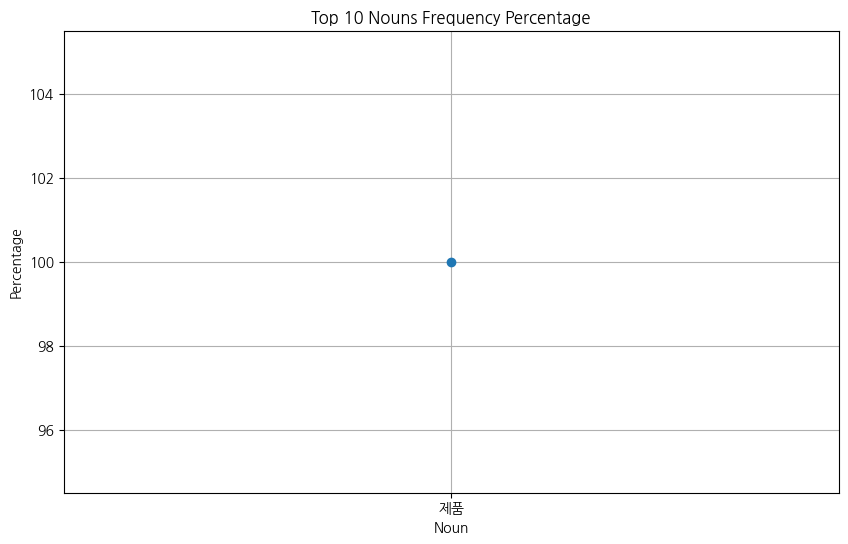

In [66]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming 'df' is your DataFrame with the 'title_nouns' column
# 기본 폰트 설정 변경
plt.rcParams['font.family'] = 'NanumGothic'
# 'title_nouns' 열의 명사 리스트를 하나의 리스트로 펼침
all_nouns = [noun for nouns_list in df['title_nouns'] for noun in nouns_list]

# 명사 빈도수 계산
nouns_counter = Counter(all_nouns)

# 빈도수가 높은 상위 10개 명사 추출
top_nouns = nouns_counter.most_common(10)

# 전체 명사 개수
total_nouns = len(all_nouns)

# 빈도수 백분율 계산
percentages = [count / total_nouns * 100 for _, count in top_nouns]

# 결과를 데이터프레임으로 변환
df_freq_percent = pd.DataFrame({'Noun': [noun for noun, _ in top_nouns], 'Percentage': percentages})

# 꺾은선 차트 출력
plt.figure(figsize=(10, 6))
plt.plot(df_freq_percent['Noun'], df_freq_percent['Percentage'], marker='o')
plt.title('Top 10 Nouns Frequency Percentage')
plt.xlabel('Noun')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()


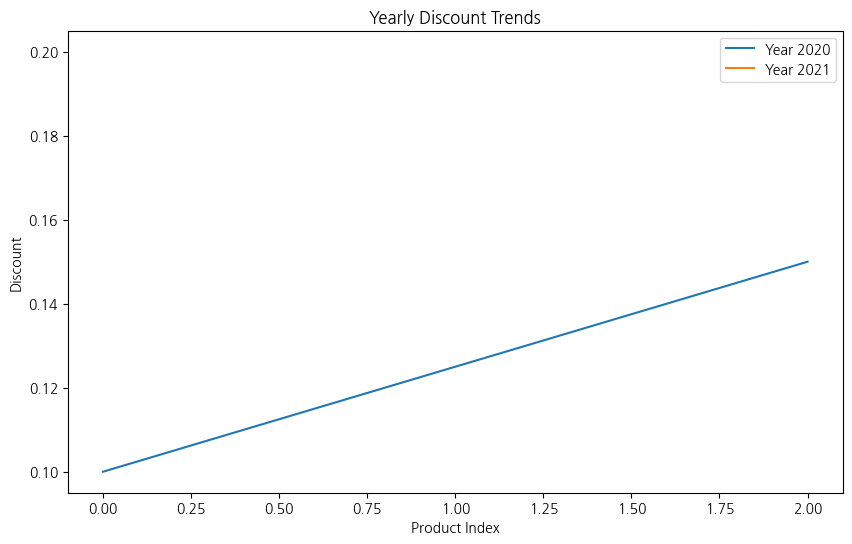

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt  # 형태소 분석기 사용을 위해 설치 필요

# 명사 추출 함수 정의 (예시: konlpy의 Okt 형태소 분석기 사용)
def extract_nouns(text):
    okt = Okt()
    return okt.nouns(text)
# 연도별 discount의 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
for year, group in df.groupby('year'):
    plt.plot(group.index, group['discount'], label=f'Year {year}')

plt.title('Yearly Discount Trends')
plt.xlabel('Product Index')
plt.ylabel('Discount')
plt.legend()
plt.show()


2. 산점도, 히스토그램

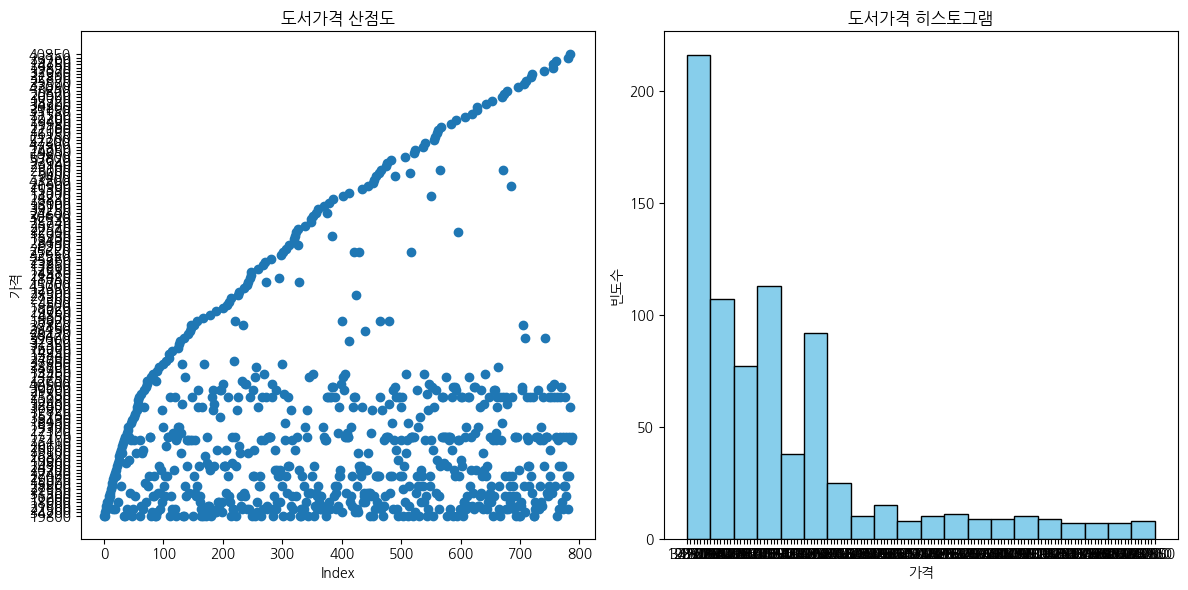

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the 'discount' column

# Scatter plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(df['discount'])), df['discount'])
plt.title('도서가격 산점도')
plt.xlabel('Index')
plt.ylabel('가격')

# Histogram
plt.subplot(1, 2, 2)
plt.hist(df['discount'], bins=20, color='skyblue', edgecolor='black')
plt.title('도서가격 히스토그램')
plt.xlabel('가격')
plt.ylabel('빈도수')

plt.tight_layout()
plt.show()


3.

In [47]:
import pandas as pd

# 'df'가 데이터프레임이라고 가정하고, 'publisher' 컬럼이 출판사를 나타낸다고 가정합니다.

# 'discount' 값이 0이 아닌 행만 선택
df_filtered = df[df['discount'] != 0]

# 각 출판사별 도서 출판 횟수
book_counts = df_filtered['publisher'].value_counts()

# 각 출판사별 도서 가격 평균
average_prices = df_filtered.groupby('publisher')['discount'].mean()

# 각 출판사별 도서 가격 중앙값(대푯값)
median_prices = df_filtered.groupby('publisher')['discount'].median()

# 각 출판사별 도서 가격 표준편차
std_dev_prices = df_filtered.groupby('publisher')['discount'].std()

# 결과를 데이터프레임으로 변환
df_publisher_stats = pd.DataFrame({
    'Book Count': book_counts,
    'Average Price': average_prices,
    'Median Price': median_prices,
    'Standard Deviation of Price': std_dev_prices
})

# 출력
df_publisher_stats

,Book Count,Average Price,Median Price,Standard Deviation of Price
21세기사,5,6.120058e+23,27000.0,3052.048492
DK로드북스,1,2.520000e+04,25200.0,NaN
J&H,1,2.250000e+04,22500.0,NaN
ORP Press,1,1.350000e+04,13500.0,NaN
UUP,1,1.235000e+04,12350.0,NaN
...,...,...,...,...
혜지원,2,1.215010e+09,22050.0,3181.980515
홍릉,17,1.164714e+83,25220.0,7661.937533
홍릉(홍릉과학출판사),1,2.156000e+04,21560.0,NaN
홍릉과학출판사,4,7.440077e+18,30225.0,4046.936084


In [49]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

# 'df'가 도서 정보를 포함하는 데이터프레임이라고 가정합니다.

# 도서 가격에 따라 데이터프레임을 정렬합니다.
sorted_df = df.sort_values(by='discount', ascending=False)

# 상위 5개 및 하위 5개 항목을 선택합니다.
top_5_expensive = sorted_df.head(5)
bottom_5_cheap = sorted_df.tail(5)

# 선택된 항목에서 이미지 URL을 추출합니다.
top_5_expensive_urls = top_5_expensive['image'].tolist()
bottom_5_cheap_urls = bottom_5_cheap['image'].tolist()

# 이미지를 다운로드하고 저장하는 함수를 정의합니다.
def download_and_save_images(urls, prefix):
    for i, url in enumerate(urls):
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.save(f"{prefix}_{i+1}.png")

# 상위 5개 비싼 도서에 대한 이미지를 다운로드하고 저장합니다.
download_and_save_images(top_5_expensive_urls, '상위_비싼_도서')

# 하위 5개 저렴한 도서에 대한 이미지를 다운로드하고 저장합니다.
download_and_save_images(bottom_5_cheap_urls, '하위_저렴한_도서')


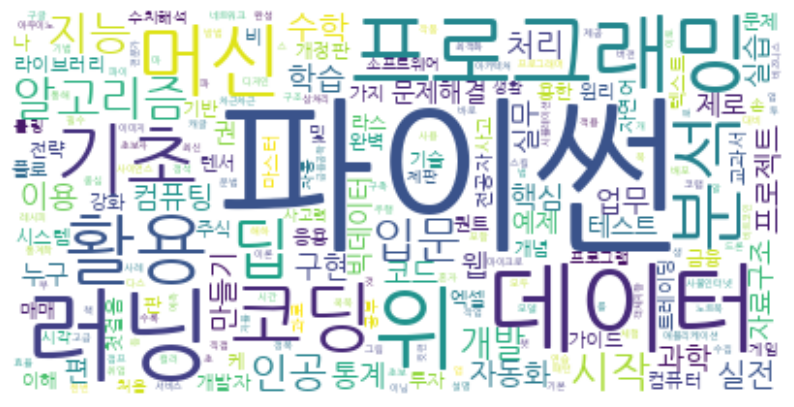

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame df with columns 'title_nouns' and 'year'
# 'title_nouns' should contain lists of nouns, and 'year' should represent the publication year

# Step 1: Group by year
grouped_by_year = df.groupby('pubdate')
# 기본 폰트 설정 변경
plt.rcParams['font.family'] = 'NanumGothic'
# Step 2 and 3: Generate word clouds for each year
for year, group in grouped_by_year:
    # Combine all nouns for the current year into a single list
    all_nouns_year = [noun for nouns_list in group['title_nouns'] for noun in nouns_list]

    # Count noun frequencies
    nouns_counter_year = Counter(all_nouns_year)

# 명사 빈도 계산
nouns_counter = Counter(all_nouns)

# WordCloud 생성 및 시각화
wordcloud = WordCloud(font_path='NanumGothic.ttf',
                      background_color='white').generate_from_frequencies(nouns_counter)

# 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


연도별 워드클라우드

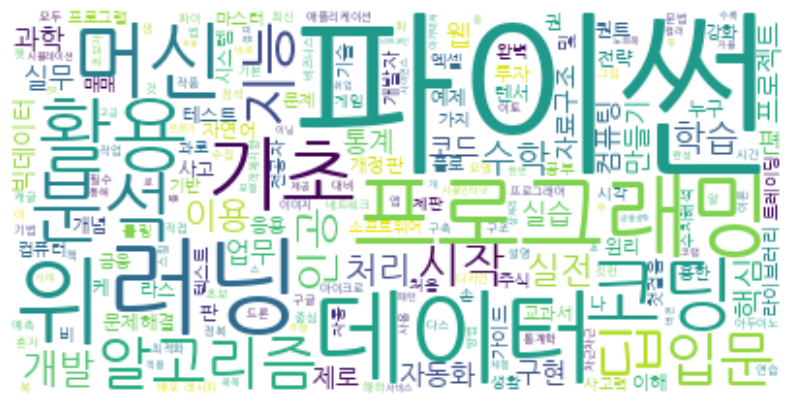

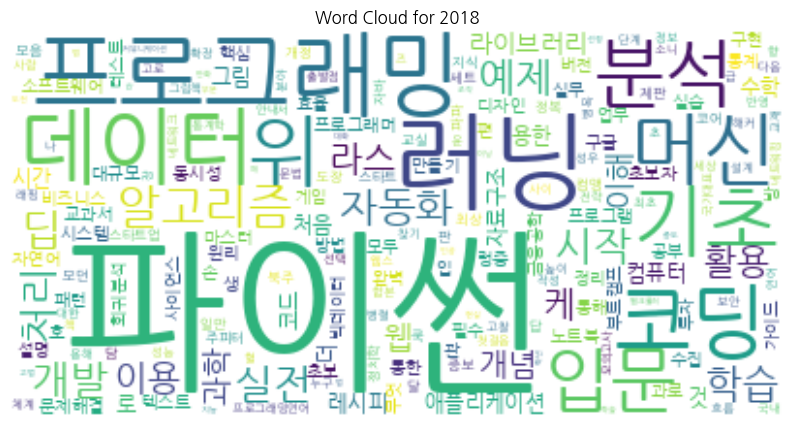

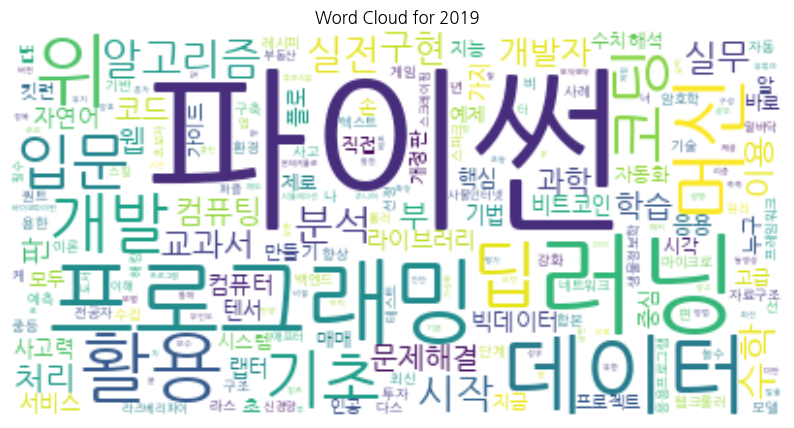

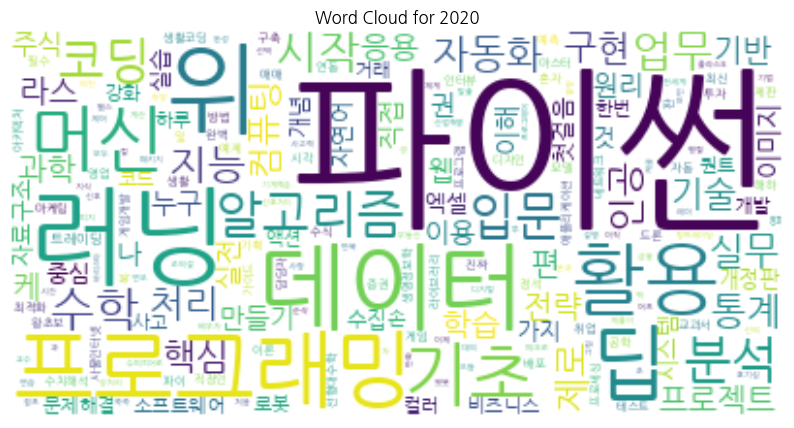

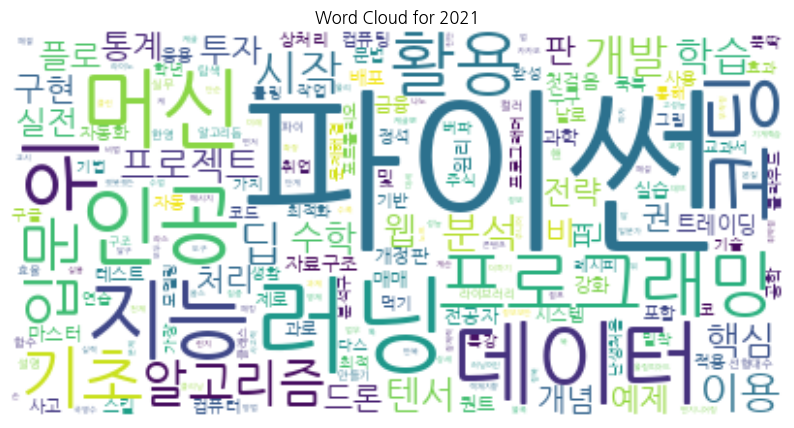

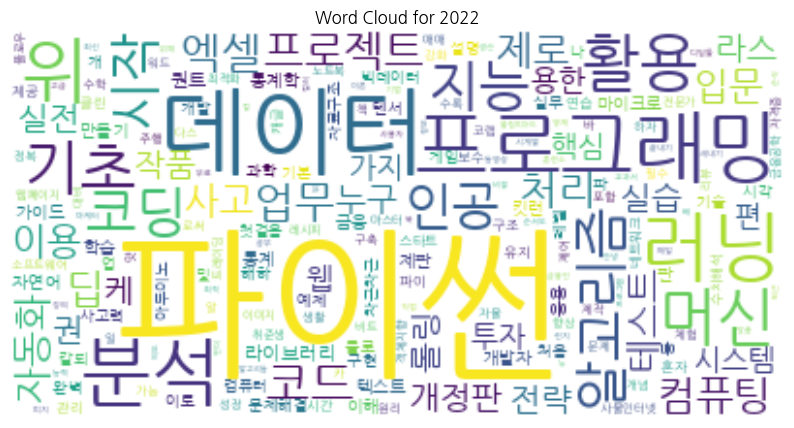

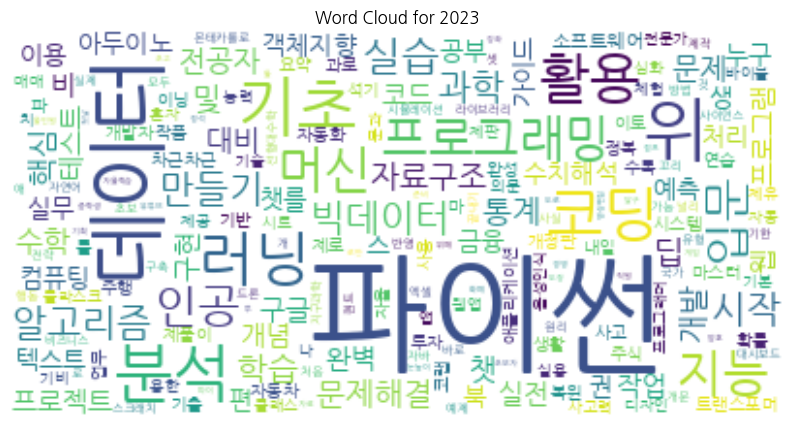

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd

# Assuming you have a DataFrame df with columns 'title_nouns' and 'pubdate'
# 'title_nouns' should contain lists of nouns, and 'pubdate' should represent the publication date in 'YYYYMMDD' format

# Group by year
df['year'] = df['pubdate'].astype(str).str[:4]
grouped_by_year = df.groupby('year')

# Combine all nouns for the current year into a single list
all_nouns = [noun for nouns_list in df['title_nouns'] for noun in nouns_list]

# Count noun frequencies
nouns_counter = Counter(all_nouns)

# WordCloud creation and visualization
wordcloud = WordCloud(font_path='NanumGothic.ttf', background_color='white').generate_from_frequencies(nouns_counter)

# Visualization
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate word clouds for each year
for year, group in grouped_by_year:
    all_nouns_year = [noun for nouns_list in group['title_nouns'] for noun in nouns_list]
    nouns_counter_year = Counter(all_nouns_year)

    # Create a WordCloud object
    wordcloud_year = WordCloud(font_path='NanumGothic.ttf', background_color='white').generate_from_frequencies(nouns_counter_year)

    # Display the word cloud for each year
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud_year, interpolation='bilinear')
    plt.title(f'Word Cloud for {year}')
    plt.axis('off')
    plt.show()
